In [2]:
import numpy as np
from toolbox.load_data import read_off, read_npy
from toolbox.rescale import rescale
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from mesh_utils import vectorized_is_point_inside_mesh

In [3]:
N = 100
t = np.linspace(0, 1, N)
space = np.stack(np.meshgrid(t, t, t), axis=-1).reshape(N**3, -1)

In [4]:
path_to_data = "../../data/"

fignames = ["duck", "torus"]
fig_data = []
for figname in fignames:
    try :
        fig_data.append(read_npy(path_to_data, figname))
    except FileNotFoundError:
        arr_verts, arr_faces = read_off(path_to_data, figname)
        arr_verts = rescale(arr_verts, 0.03, 0.97)
        fig_data.append(vectorized_is_point_inside_mesh(space, arr_verts, arr_faces).reshape(N, N, N).astype(np.float32))

In [5]:
fig_arr = fig_data[1]
points_inside = (fig_arr.reshape(N**3, -1) > 0.1).ravel()
points = space[points_inside]

In [6]:
import pyvista as pv

In [7]:
points

array([[0.23232323, 0.64646465, 0.44444444],
       [0.23232323, 0.64646465, 0.45454545],
       [0.23232323, 0.64646465, 0.46464646],
       ...,
       [0.87878788, 0.86868687, 0.49494949],
       [0.87878788, 0.86868687, 0.50505051],
       [0.87878788, 0.86868687, 0.51515152]])

In [8]:
pv.Sphere().points

pyvista_ndarray([[ 0.        ,  0.        ,  0.5       ],
                 [ 0.        ,  0.        , -0.5       ],
                 [ 0.05405951,  0.        ,  0.49706897],
                 ...,
                 [ 0.15616201, -0.03319326, -0.4738266 ],
                 [ 0.10513641, -0.02234743, -0.48831028],
                 [ 0.05287818, -0.0112396 , -0.49706897]], dtype=float32)

In [19]:
#surf = pv.wrap(points).extract_surface()
surf = pv.wrap(points).reconstruct_surface()

: 

/Users/acram/Desktop/VSCode_projects/advanced_ml/venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/acram/Desktop/VSCode_projects/advanced_ml/venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


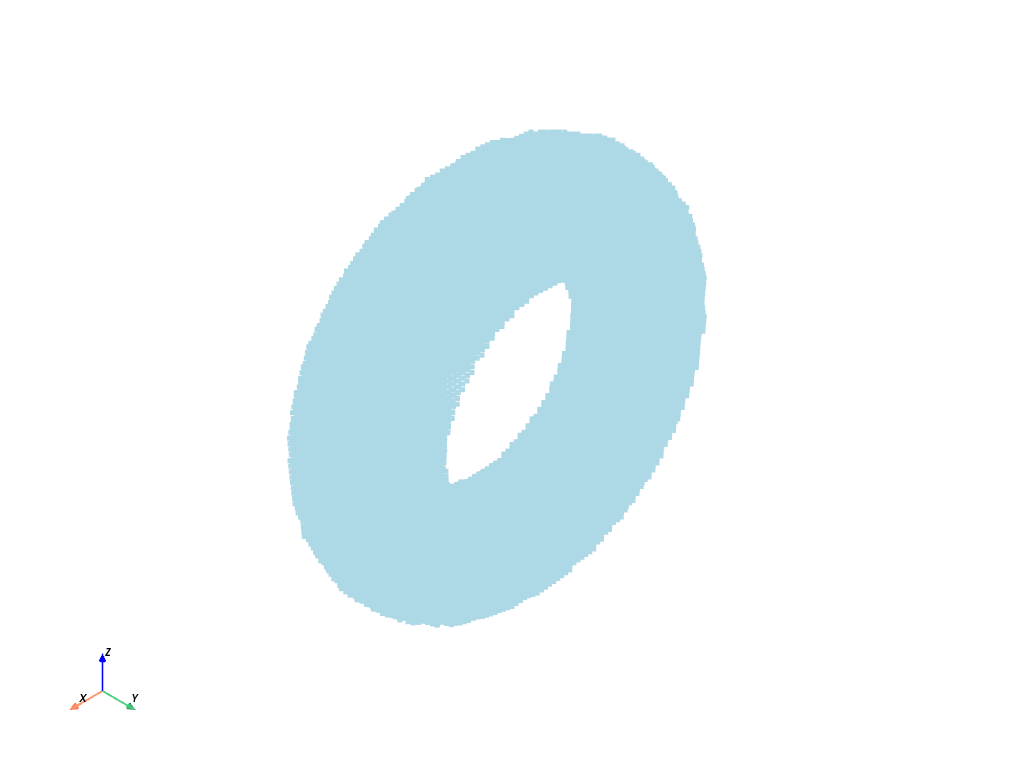

In [10]:
surf.plot()

In [ ]:
pl = pv.Plotter(shape=(1, 2))
pl.add_mesh(pv.wrap(points))
pl.add_title('Point Cloud of 3D Surface')
pl.subplot(0, 1)
pl.add_mesh(surf, color=True, show_edges=True)
pl.add_title('Reconstructed Surface')
pl.show()

In [12]:
import numpy as np

import pyvista as pv
from pyvista import CellType

In [15]:
lin_pts = np.array(
    [
        [-1, -1, -1],  # point 0
        [1, -1, -1],  # point 1
        [1, 1, -1],  # point 2
        [-1, 1, -1],  # point 3
        [-1, -1, 1],  # point 4
        [1, -1, 1],  # point 5
        [1, 1, 1],  # point 6
        [-1, 1, 1],  # point 7
    ],
    np.double,
)

# these are the "midside" points of a quad cell.  See the definition of a
# vtkQuadraticHexahedron at:
# https://vtk.org/doc/nightly/html/classvtkQuadraticHexahedron.html
quad_pts = np.array(
    [
        (lin_pts[1] + lin_pts[0]) / 2,  # between point 0 and 1
        (lin_pts[1] + lin_pts[2]) / 2,  # between point 1 and 2
        (lin_pts[2] + lin_pts[3]) / 2,  # and so on...
        (lin_pts[3] + lin_pts[0]) / 2,
        (lin_pts[4] + lin_pts[5]) / 2,
        (lin_pts[5] + lin_pts[6]) / 2,
        (lin_pts[6] + lin_pts[7]) / 2,
        (lin_pts[7] + lin_pts[4]) / 2,
        (lin_pts[0] + lin_pts[4]) / 2,
        (lin_pts[1] + lin_pts[5]) / 2,
        (lin_pts[2] + lin_pts[6]) / 2,
        (lin_pts[3] + lin_pts[7]) / 2,
    ]
)

# introduce a minor variation to the location of the mid-side points
quad_pts += np.random.random(quad_pts.shape) * 0.3
pts = np.vstack((lin_pts, quad_pts))

# create the grid
cells = np.hstack((20, np.arange(20))).astype(np.int64, copy=False)
celltypes = np.array([CellType.QUADRATIC_HEXAHEDRON])
grid = pv.UnstructuredGrid(cells, celltypes, pts)

In [18]:
grid

UnstructuredGrid,Information
N Cells,1
N Points,20
X Bounds,"-1.000e+00, 1.111e+00"
Y Bounds,"-1.000e+00, 1.296e+00"
Z Bounds,"-1.000e+00, 1.269e+00"
N Arrays,0


/Users/acram/Desktop/VSCode_projects/advanced_ml/venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/acram/Desktop/VSCode_projects/advanced_ml/venv/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


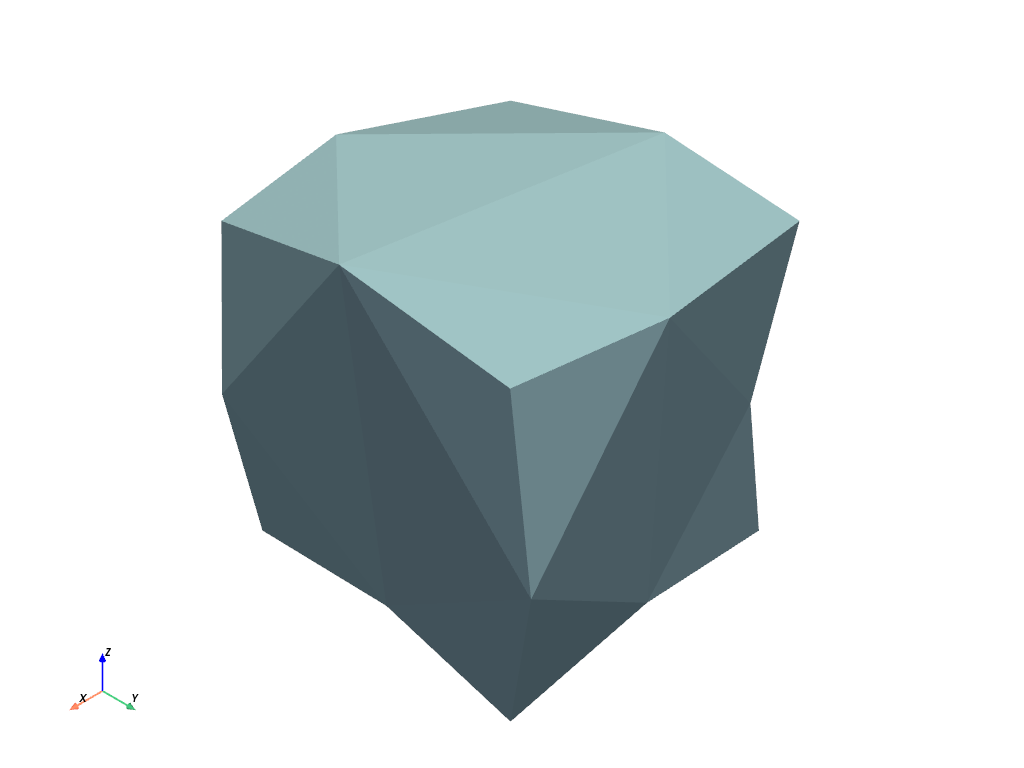

In [14]:
# finally, extract the surface and plot it
surf = grid.extract_surface()
surf.plot(show_scalar_bar=False)